# Nueva sección

In [2]:
!python --version

Python 3.11.11


In [3]:
!pip install -U tensorflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 79.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 74.6 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-text 2.18.1 requires tensorflow<2.19,>=2.18.0, but you have tensorflow

In [5]:
import tensorflow as tf
print('Tensorflow ' + tf.__version__)

Tensorflow 2.19.0


In [6]:
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import det_curve
from sklearn.metrics import accuracy_score

In [8]:
# Preparo los datos
data = pd.read_csv('archivo_modificado_final.csv')

# Definir el umbral de no nulos
umbral = 0.90

# Calcular el porcentaje de valores no nulos por columna
porcentaje_no_nulos = data.notnull().mean()

# Filtrar las columnas que cumplen con el umbral
columnas_filtradas = porcentaje_no_nulos[porcentaje_no_nulos > umbral].index

# Crear un nuevo DataFrame con solo esas columnas
df_filtrado = data[columnas_filtradas]

# Mostrar el resultado
print(df_filtrado.shape)

(7440, 63)


In [9]:
# Definir el umbral de no nulos
umbral_filas = 0.30

# Calcular el número mínimo de valores no nulos requeridos por fila
min_no_nulos = int(umbral_filas * df_filtrado.shape[1])

# Eliminar las filas que no cumplen con el umbral
df_filtrado_filas = df_filtrado.dropna(thresh=min_no_nulos)

# Mostrar el resultado
print(df_filtrado_filas.shape)

(7440, 63)


In [10]:
# Saco la mediana de cada columna y la relleno en los valores nulos
df_filtrado_filas2 = df_filtrado_filas.drop(columns=['usuario'])
df_filtrado_filas2 = df_filtrado_filas2.fillna(df_filtrado_filas2.mean())
df_filtrado_filas2 = df_filtrado_filas2.round(2)

In [11]:
# Separar características y etiquetas
X = df_filtrado_filas2.drop(columns=df_filtrado_filas2.columns[1]).values  # Todas las columnas excepto la tercera como características
y = df_filtrado_filas2.iloc[:, 1].values  # Tercera columna como etiqueta


# Reemplazar valores infinitos por NaN
X[np.isinf(X)] = np.nan

# Reemplazar NaN por la media de la columna
X = np.nan_to_num(X, nan=np.nanmean(X))

# Normalizar características
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Codificar etiquetas
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# Dividir en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Construir el modelo ANN
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# Evaluar el modelo
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Precisión en test: {test_acc * 100:.2f}%')

# Obtener predicciones de probabilidad
y_probs = model.predict(X_test)

# Obtener las predicciones del modelo
y_pred = np.argmax(model.predict(X_test), axis=1)

# Calcular la precisión de cada dígito
for i in range(10):
    # Filtrar los valores para el dígito i
    y_true_digit = (y_test == i)
    y_pred_digit = (y_pred == i)

    # Calcular precisión para ese dígito
    digit_accuracy = accuracy_score(y_true_digit, y_pred_digit)
    print(f'Precisión para el dígito {i}: {digit_accuracy * 100:.2f}%')

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
186/186 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4403 - loss: 1.7186 - val_accuracy: 0.8595 - val_loss: 0.4894
Epoch 2/30
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8410 - loss: 0.5304 - val_accuracy: 0.8891 - val_loss: 0.3477
Epoch 3/30
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8664 - loss: 0.4081 - val_accuracy: 0.9093 - val_loss: 0.2560
Epoch 4/30
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8974 - loss: 0.3061 - val_accuracy: 0.9194 - val_loss: 0.2329
Epoch 5/30
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9102 - loss: 0.2675 - val_accuracy: 0.9288 - val_loss: 0.2129
Epoch 6/30
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9257 - loss: 0.2451 - val_accuracy: 0.9348 - val_loss: 0.1929
Epoch 7/30
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9259 - loss: 0.2322 - val_accuracy: 0.9402 - val_loss: 0.1756
Epoch 8/30
186/186 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9333 - loss: 0.1884 - val_accuracy: 0.

PermutationExplainer explainer: 1001it [01:53,  8.45it/s]                          
<ipython-input-12-985272aeb240>:10: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test[:1000], feature_names=df_filtrado_filas2.drop(columns=df_filtrado_filas2.columns[1]).columns)


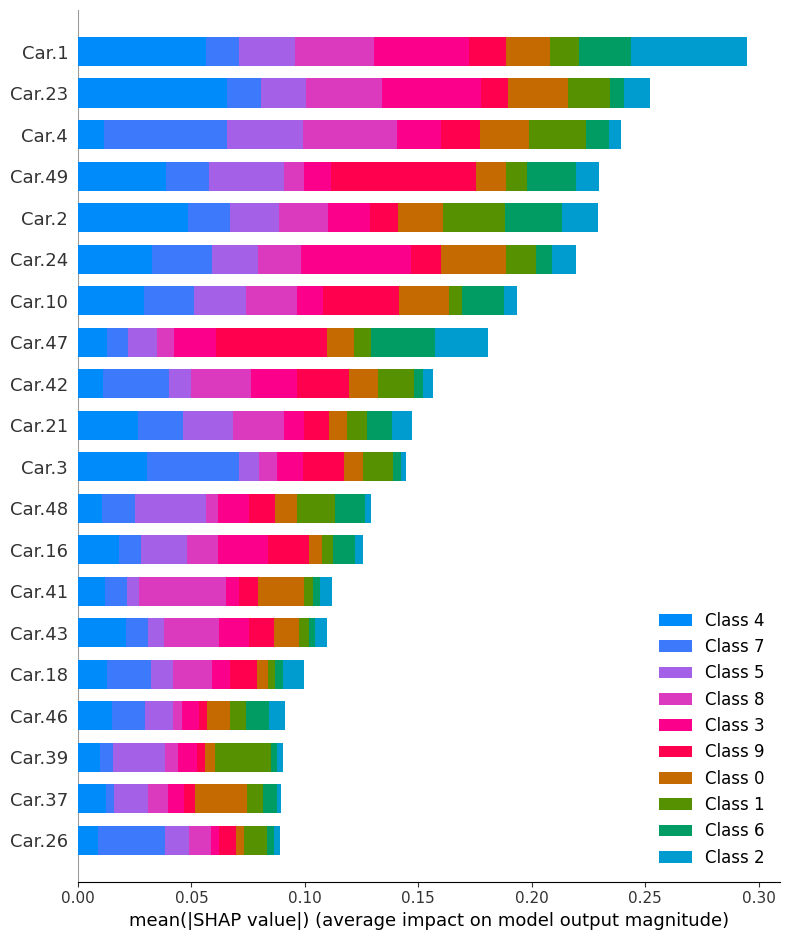

In [12]:
import shap

# Crear un explainer basado en el modelo entrenado
explainer = shap.Explainer(model, X_train)

# Obtener valores SHAP para las primeras 100 muestras (puedes aumentar)
shap_values = explainer(X_test[:1000])

# Visualizar importancia de características
shap.summary_plot(shap_values, X_test[:1000], feature_names=df_filtrado_filas2.drop(columns=df_filtrado_filas2.columns[1]).columns)

In [23]:
# Separar características y etiquetas (tal como lo tenías)
X = df_filtrado_filas2.drop(columns=df_filtrado_filas2.columns[1]).values  # Todas las columnas excepto la segunda (etiqueta)
y = df_filtrado_filas2.iloc[:, 1].values  # La segunda columna como etiqueta

# Reemplazar valores infinitos por NaN
X[np.isinf(X)] = np.nan

# Reemplazar NaN por la media de la columna
X = np.nan_to_num(X, nan=np.nanmean(X))

# Normalizar características
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Codificar etiquetas
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# -----------------------------------------------------------------
# Obtener la lista de usuarios únicos de la tercera columna (índice 2)
usuarios_unicos = df_filtrado_filas2.iloc[:, 2].unique()
np.random.seed(42)  # Para reproducibilidad

# Seleccionar el mínimo entre 40 y la cantidad de usuarios únicos disponibles
num_usuarios = min(40, len(usuarios_unicos))
usuarios_entrenamiento = np.random.choice(usuarios_unicos, size=num_usuarios, replace=False)

# Crear máscaras: las filas cuyo número de usuario (columna 3) esté en usuarios_entrenamiento serán de entrenamiento
mask_train = np.isin(df_filtrado_filas2.iloc[:, 2], usuarios_entrenamiento)
mask_test = ~mask_train

# Dividir X e y según las máscaras
X_train = X[mask_train]
y_train = y[mask_train]
X_test = X[mask_test]
y_test = y[mask_test]
# -----------------------------------------------------------------

# Construir el modelo ANN
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# Evaluar el modelo
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Precisión en test: {test_acc * 100:.2f}%')

# Obtener predicciones de probabilidad
y_probs = model.predict(X_test)

# Obtener las predicciones del modelo
y_pred = np.argmax(model.predict(X_test), axis=1)

# Calcular la precisión de cada dígito
for i in range(10):
    # Filtrar los valores para el dígito i
    y_true_digit = (y_test == i)
    y_pred_digit = (y_pred == i)

    # Calcular precisión para ese dígito
    digit_accuracy = accuracy_score(y_true_digit, y_pred_digit)
    print(f'Precisión para el dígito {i}: {digit_accuracy * 100:.2f}%')

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


233/233 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4699 - loss: 1.5705
Epoch 2/30
 73/233 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8325 - loss: 0.5304

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8429 - loss: 0.4961
Epoch 3/30
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8816 - loss: 0.3695
Epoch 4/30
233/233 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8989 - loss: 0.2938
Epoch 5/30
233/233 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9189 - loss: 0.2450
Epoch 6/30
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9191 - loss: 0.2359
Epoch 7/30
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9404 - loss: 0.1941
Epoch 8/30
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9461 - loss: 0.1725
Epoch 9/30
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9429 - loss: 0.1675
Epoch 10/30
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9464 - loss: 0.1604
Epoch 11/30
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9547 - loss: 0.1423
Epoch 12/30
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9586 - loss: 0.1278
Epoch 13/30
233/233 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accurac

ValueError: math domain error

In [21]:
# Separar características y etiquetas (tal como lo tenías)
X = df_filtrado_filas2.drop(columns=df_filtrado_filas2.columns[1]).values  # Todas las columnas excepto la segunda (etiqueta)
y = df_filtrado_filas2.iloc[:, 1].values  # La segunda columna como etiqueta

# Reemplazar valores infinitos por NaN
X[np.isinf(X)] = np.nan

# Reemplazar NaN por la media de la columna
X = np.nan_to_num(X, nan=np.nanmean(X))

# Normalizar características
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Codificar etiquetas
encoder = LabelEncoder()
y = encoder.fit_transform(y)

# -----------------------------------------------------------------
# Obtener la lista de usuarios únicos de la tercera columna (índice 2)
usuarios_unicos = df_filtrado_filas2.iloc[:, 2].unique()
np.random.seed(42)  # Para reproducibilidad

# Calcular el número de usuarios para entrenamiento (40% de los usuarios)
num_usuarios_train = int(0.41 * len(usuarios_unicos))

# Seleccionar usuarios para entrenamiento
usuarios_entrenamiento = np.random.choice(usuarios_unicos, size=num_usuarios_train, replace=False)

# Crear máscaras: las filas cuyo número de usuario (columna 3) esté en usuarios_entrenamiento serán de entrenamiento
mask_train = np.isin(df_filtrado_filas2.iloc[:, 2], usuarios_entrenamiento)
mask_test = ~mask_train

# Dividir X e y según las máscaras
X_train = X[mask_train]
y_train = y[mask_train]
X_test = X[mask_test]
y_test = y[mask_test]
# -----------------------------------------------------------------

# ... (resto del código) ...

# Construir el modelo ANN
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

# Compilar el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=(X_test, y_test))

# Evaluar el modelo
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Precisión en test: {test_acc * 100:.2f}%')

# Obtener predicciones de probabilidad
y_probs = model.predict(X_test)

# Obtener las predicciones del modelo
y_pred = np.argmax(model.predict(X_test), axis=1)

# Calcular la precisión de cada dígito
for i in range(10):
    # Filtrar los valores para el dígito i
    y_true_digit = (y_test == i)
    y_pred_digit = (y_pred == i)

    # Calcular precisión para ese dígito
    digit_accuracy = accuracy_score(y_true_digit, y_pred_digit)
    print(f'Precisión para el dígito {i}: {digit_accuracy * 100:.2f}%')


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


ValueError: math domain error